In [346]:
%matplotlib inline

In [347]:
import sys
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt

In [348]:
train = pd.read_csv('../data/train.csv', header = 0, dtype={'Age': np.float64})
test = pd.read_csv('../data/test.csv', header = 0, dtype={'Age': np.float64})
full_data = [train, test]

In [349]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [350]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0,0.5,u'people')

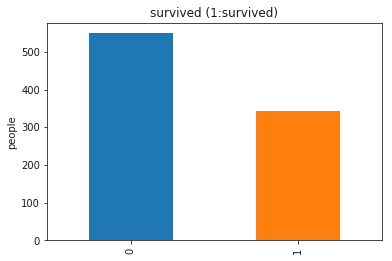

In [351]:
train.Survived.value_counts().plot(kind='bar')
plt.title(u"survived (1:survived)") # 标题
plt.ylabel(u"people")

Text(0,0.5,u'cabin_level')

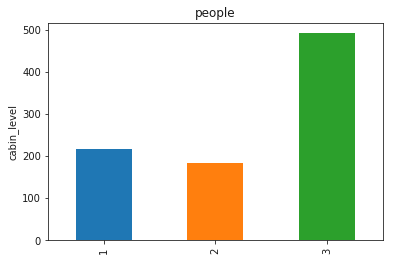

In [352]:
train.Pclass.value_counts(sort = False).plot(kind='bar')
plt.title(u"people")
plt.ylabel(u"cabin_level")

Text(0.5,1,u'age-survived (1:survived)')

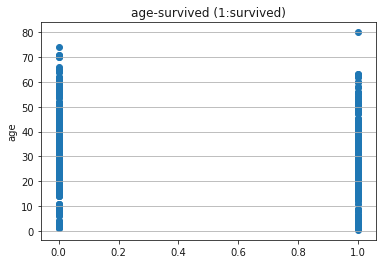

In [353]:
plt.scatter(train.Survived, train.Age)
plt.ylabel(u"age")
plt.grid(b = True, which = 'major', axis = 'y')
plt.title(u"age-survived (1:survived)")

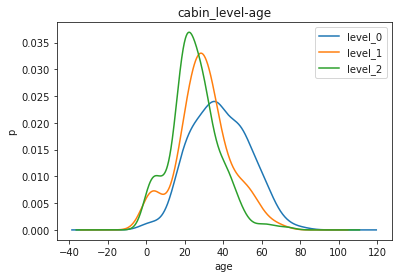

In [354]:
train.Age[train.Pclass == 1].plot(kind='kde') # Kernel Density Estimation
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")
plt.ylabel(u"p")
plt.title(u"cabin_level-age")
plt.legend((u'level_0', u'level_1', u'level_2'), loc = 'best')

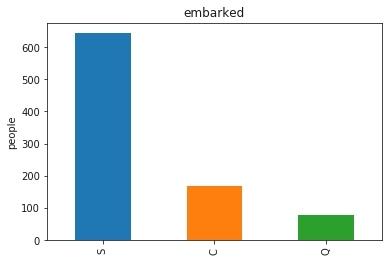

In [355]:
train.Embarked.value_counts().plot(kind='bar')
plt.title(u"embarked")
plt.ylabel(u"people")
plt.show()

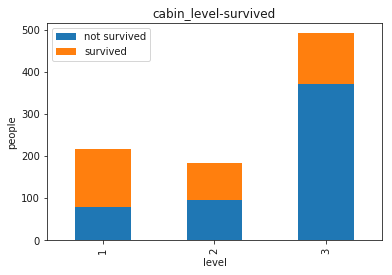

In [356]:
Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df = pd.DataFrame({u'survived':Survived_1, u'not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"cabin_level-survived")
plt.xlabel(u"level")
plt.ylabel(u"people")
plt.show()

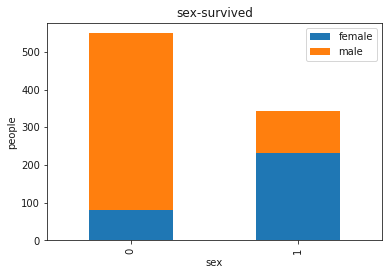

In [357]:
Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"sex-survived")
plt.xlabel(u"sex")
plt.ylabel(u"people")
plt.show()

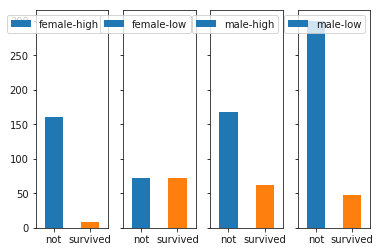

In [358]:
fig = plt.figure()

ax1 = fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="female, high class")
ax1.set_xticklabels([u"not", u"survived"], rotation = 0)
ax1.legend([u"female-high"], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label="female, low class")
ax2.set_xticklabels([u"not", u"survived"], rotation = 0)
ax2.legend([u"female-low"], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label="male, high class")
ax3.set_xticklabels([u"not", u"survived"], rotation = 0)
ax3.legend([u"male-high"], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label="male, low class")
ax4.set_xticklabels([u"not", u"survived"], rotation = 0)
ax4.legend([u"male-low"], loc='best')

plt.show()

# SibSp and Parch

In [359]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [360]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Age', 'Survived']].groupby(['IsAlone'], as_index = False).mean())

   IsAlone        Age  Survived
0        0  26.413452  0.505650
1        1  32.220297  0.303538


# Embarked

In [361]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


# Fare

In [362]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index = False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


# Age

In [363]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index = False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.516949
1   (16.0, 32.0]  0.353075
2   (32.0, 48.0]  0.374016
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Name

In [364]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
print (pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [365]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

print (train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.704301
2      Mr  0.156673
3     Mrs  0.792000
4    Rare  0.347826


In [366]:
for dataset in full_data:
    # Mopping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mopping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mopping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mopping Fare
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mopping Age
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

id_series = pd.Series(test["PassengerId"])
test = test.drop(drop_elements, axis = 1)

print (train.head(10))

train_pd, test_pd = train, test

train = train.drop(['Parch', 'FamilySize'], axis = 1)
test = test.drop(['Parch', 'FamilySize'], axis = 1)

train = train.values
test = test.values

   Survived  Pclass  Sex  Age  Parch  Fare  Embarked  FamilySize  IsAlone  \
0         0       3    1    1      0     0         0           2        0   
1         1       1    0    2      0     3         1           2        0   
2         1       3    0    1      0     1         0           1        1   
3         1       1    0    2      0     3         0           2        0   
4         0       3    1    2      0     1         0           1        1   
5         0       3    1    1      0     1         2           1        1   
6         0       1    1    3      0     3         0           1        1   
7         0       3    1    0      1     2         0           5        0   
8         1       3    0    1      2     1         0           3        0   
9         1       2    0    0      0     2         1           2        0   

   Title  
0      1  
1      3  
2      2  
3      3  
4      1  
5      1  
6      1  
7      4  
8      3  
9      3  


In [367]:
print(train)

[[0 3 1 ... 0 0 1]
 [1 1 0 ... 1 0 3]
 [1 3 0 ... 0 1 2]
 ...
 [0 3 0 ... 0 0 2]
 [1 1 1 ... 1 1 1]
 [0 3 1 ... 2 1 1]]


# Classifier Comparison

In [368]:
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [369]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

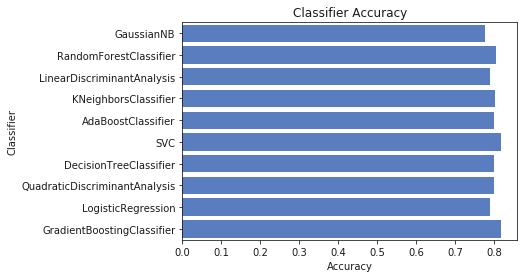

In [370]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # print (y_train.shape, y_test.shape)
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    # print (log_entry)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [371]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)

In [372]:
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [373]:
result_df = pd.DataFrame({"PassengerId": id_series, "Survived": result})
result_df.to_csv('../data/result.csv', index=False)

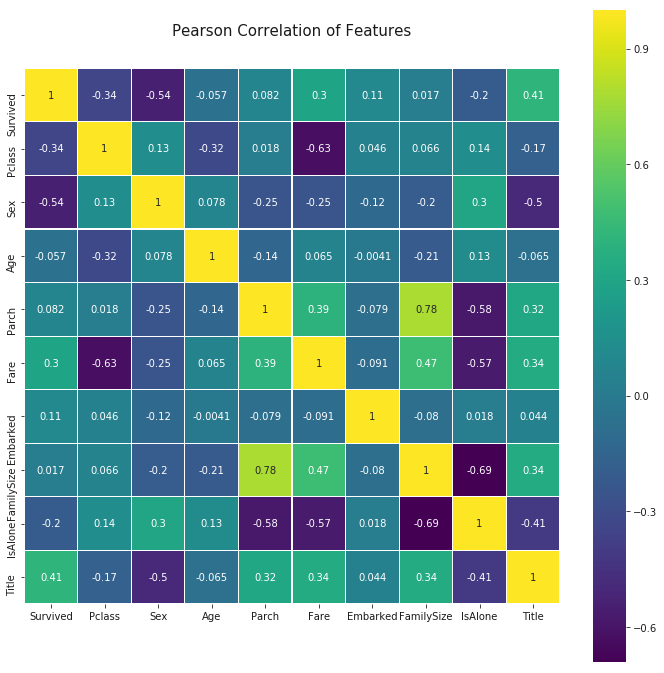

In [374]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_pd.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

d:\program files (x86)\python\lib\site-packages\statsmodels-0.8.0-py2.7-win-amd64.egg\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\program files (x86)\python\lib\site-packages\statsmodels-0.8.0-py2.7-win-amd64.egg\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\program files (x86)\python\lib\site-packages\statsmodels-0.8.0-py2.7-win-amd64.egg\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
d:\program files (x86)\python\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


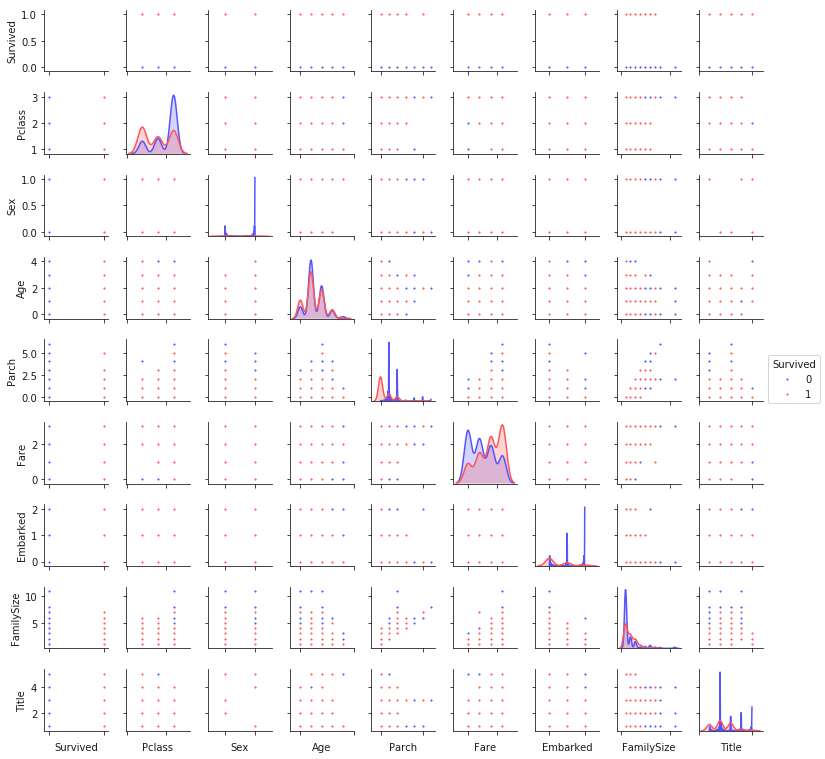

In [375]:
g = sns.pairplot(train_pd[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',\
                          u'FamilySize', u'Title']], hue='Survived', palette = 'seismic', size=1.2, diag_kind = \
                'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [377]:
train_pd.shape[0]

891